# Regresión lineal con Python y sklearn
_En este notebook presentamos un ejemplo de cómo hacer una regresión lineal utilizando el dataset de Car Price_

In [ ]:
#%pip install seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [29]:
# cargar el dataset local
rutadatasets = 'D:/proyectos/Master-IA-Unir/02-Aprendizaje-automatico/datasets/'
car_df = pd.read_csv(rutadatasets + 'CarPrice.csv')

In [62]:
# funcion para  identifar las instancias y columnas del dataset.
car_df.shape

(205, 26)

**EDA**

Habría que hacer un análisis exploratorio de los datos en base a la tarea que tenemos que resolver.

_En el laboratorio  nos centraremos en explicar lo que es un EDA y cómo llevarlo a cabo_

Estamos viendo una regresión lineal simple, es decir vamos a realizar la predicción haciendo uso exclusivo de una variable independendiente.

In [33]:
## EDA ##
# Configuramos el estilo de los gráficos
sns.set(style="whitegrid")

**EDA 1**

**head()**

- permite ver las primeras filas y tener una idea general de las variables disponibles.

In [63]:
## EDA 1 ##
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**EDA 2**

**info()**

- Muestra el **número de filas, columnas y los tipos de datos de cada variable.** Esto ayuda a identificar si hay columnas con tipos inadecuados o si se requiere conversión de datos.

In [64]:
## EDA 2##
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**EDA 3**

**describe()**

- Genera estadísticas básicas __(media, desviación estándar, percentiles, etc.)__ para las variables numéricas. Con esto se puede conocer la distribución de los datos y detectar posibles valores atípicos o errores en la entrada de datos.

In [65]:
## EDA 3##
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**EDA 4**

** isnull()**

- Revisa si existen valores nulos en el dataset. 
- La presencia de datos faltantes puede afectar el análisis, por lo que es necesario decidir si se imputan (rellenan) o se eliminan dichos registros.

In [66]:
## EDA 4##
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**EDA 5**

**ANALISIS DE LAS VARIABLES:** Análisis univariado de la variable objetivo (price)

**Histograma y KDE:** Se utiliza un histograma para ver la distribución de la variable price. 
La curva KDE (Kernel Density Estimate) ayuda a visualizar la densidad de los datos y detectar si la distribución es normal o presenta sesgos.

**Importancia:** Comprender la distribución de la variable objetivo es fundamental para decidir transformaciones o identificar la presencia de outliers.

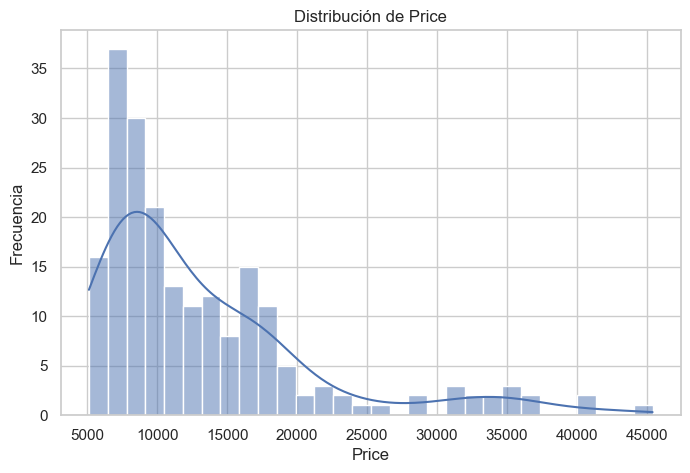

In [67]:
## EDA 5##

plt.figure(figsize=(8, 5))
sns.histplot(car_df['price'], kde=True, bins=30)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()


**EDA 6**

**Análisis univariado de otras variables importantes**

*Variables relevantes:* Se analizan otras variables que pueden influir en el precio, como enginesize y horsepower.

*Objetivo:* Observar su distribución, identificar posibles sesgos o valores extremos y entender su comportamiento antes de relacionarlas con price.

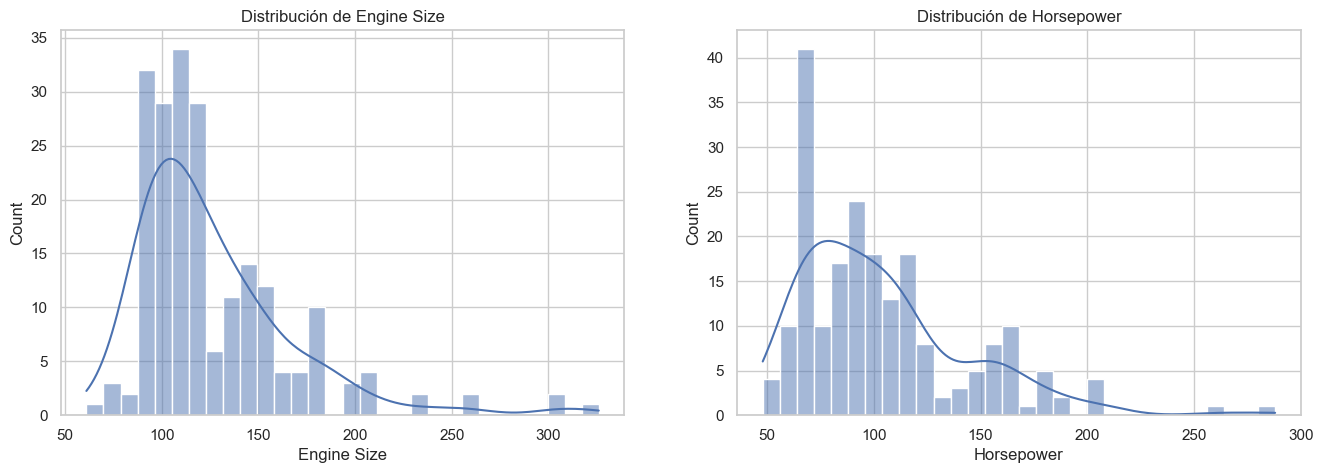

In [68]:
## EDA 6 ##
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(car_df['enginesize'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribución de Engine Size')
axes[0].set_xlabel('Engine Size')

sns.histplot(car_df['horsepower'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribución de Horsepower')
axes[1].set_xlabel('Horsepower')

plt.show()

**EDA 7**

**Detección de outliers con boxplots**

**Boxplot:** Permite visualizar los valores atípicos (outliers) en la variable price.

**Decisión:** Si se detectan outliers, se debe evaluar si son errores o si representan variaciones legítimas en los datos. Esto es crucial para evitar que afecten el rendimiento de los modelos.

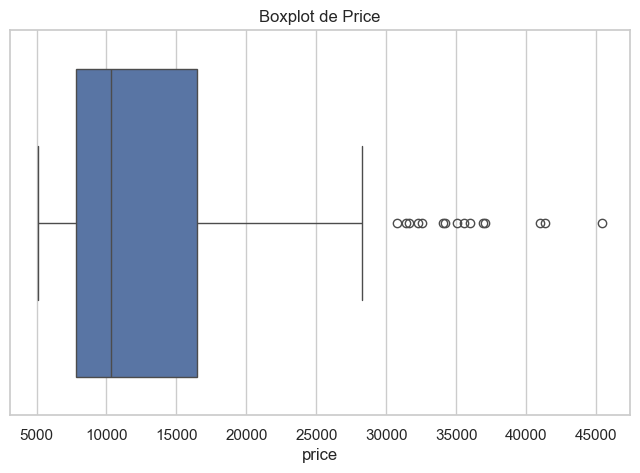

In [69]:
## EDA 7 ##
plt.figure(figsize=(8, 5))
sns.boxplot(x=car_df['price'])
plt.title('Boxplot de Price')
plt.show()

**EDA 8**

**Análisis de correlación**

**Matriz de correlación:** Se calcula la correlación entre las variables numéricas del dataset.

**Heatmap:** El mapa de calor ayuda a visualizar fácilmente qué variables están fuertemente correlacionadas.

**Propósito:** Identificar relaciones potencialmente lineales entre price y otras variables, lo que es esencial para la selección de variables en modelos de regresión.

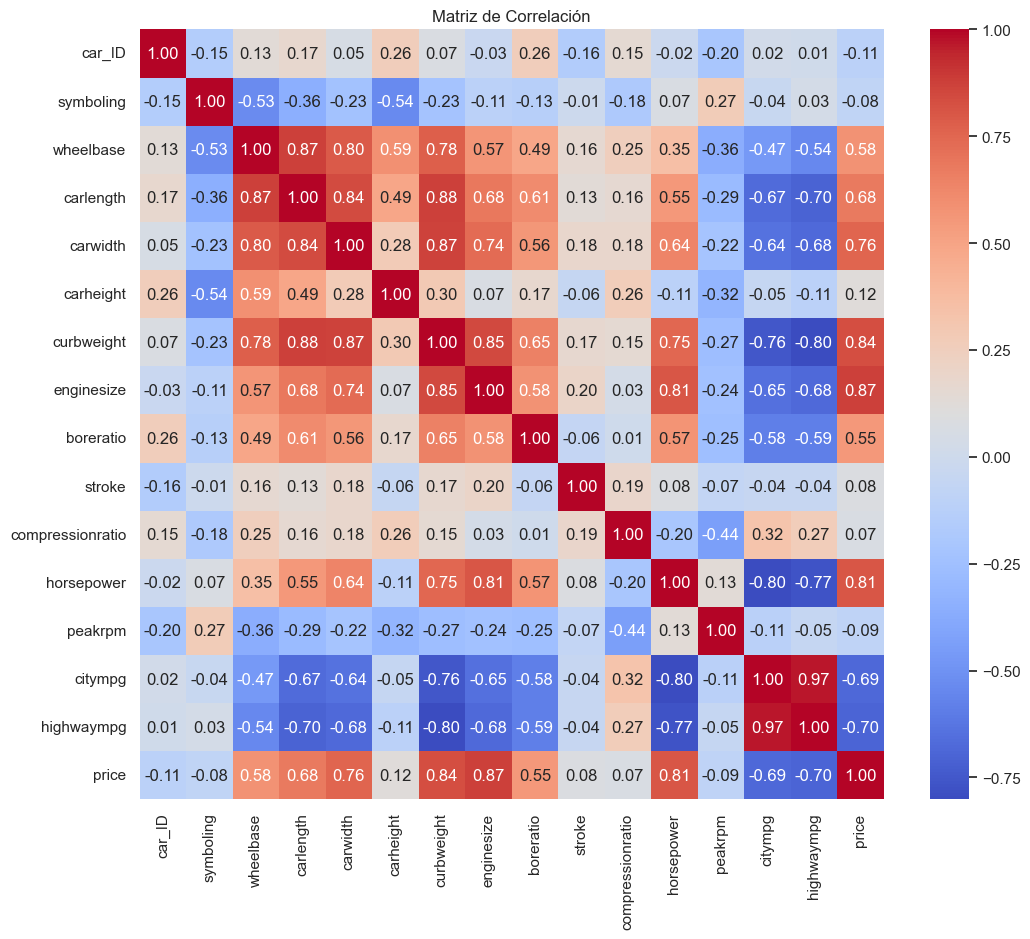

In [71]:
## EDA 8##
plt.figure(figsize=(12, 10))
numeric_car_df = car_df.select_dtypes(include=[np.number])
corr_matrix = numeric_car_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [40]:
## EDA ##

In [41]:
car_df['enginesize']

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [42]:
df = car_df.filter(['enginesize','price'], axis=1)

In [43]:
df.head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [44]:
from sklearn.model_selection import train_test_split

# Separamos los datos en conjunto de entrenamiento y conjunto de test (80/20)
X_train, X_test, y_train, y_test = train_test_split(df['enginesize'],df['price'],test_size=20, random_state=0)

In [45]:
X_test.shape

(20,)

In [46]:
X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

In [47]:
# Creamos un objeto de Regresion lineal
regr = linear_model.LinearRegression()

In [48]:
# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)

LinearRegression()

In [49]:
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
car_y_pred = regr.predict(X_test)

In [50]:
car_y_pred

array([ 7212.74357247, 19078.9021705 , 14840.98838549,  2127.24703046,
       10264.04149768, 16536.15389949,  7382.26012387,  7382.26012387,
       22469.23319851,  7382.26012387, 19587.4518247 , 26198.59732931,
        3652.89599306, 14501.95528269,  7043.22702107, 16536.15389949,
       14162.92217989, 14840.98838549, 10433.55804908,  7382.26012387])

In [51]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
Name: price, dtype: float64

In [52]:
# MSE, mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, car_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.2f" % r2_score(y_test, car_y_pred))

Mean squared error: 13636361.33
R2: 0.67


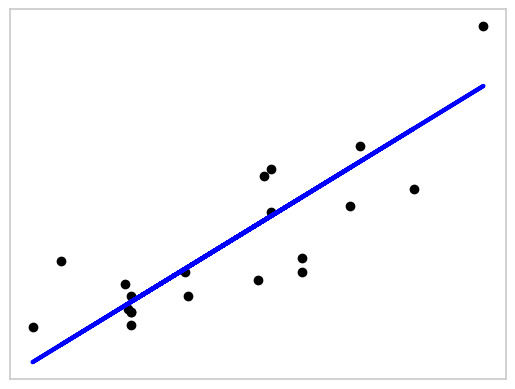

In [53]:
# Plot
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, car_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

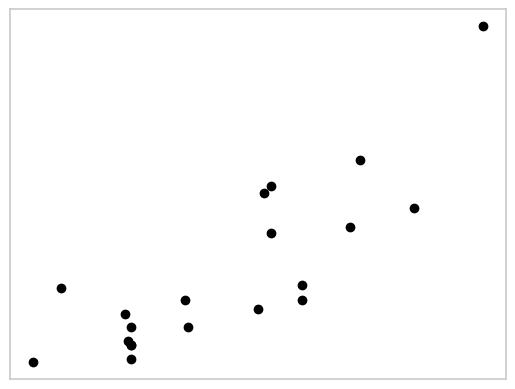

In [54]:
plt.scatter(car_y_pred, y_test, color="black")

plt.xticks(())
plt.yticks(())

plt.show()

## Ejercicio para practicar

**¿Hemos seguido las suposiciones de Regresión lineal?**

1. Features y target relación lineal.
   * Comprobar con un plot que la variable elegida se relaciona de manera lineal con la variable objetivo.
2. Variables independientes no correlacionadas.
   * Mapa de calor o distribución de correlaciones entre variables independientes.
3. Distribución normal de los residuos.
    * Comprobar con un plot que la diferencia entre los valores de test de la variable y los valores de predicción siguen(se asemejan) una distribución normal.
4. Homocedasticidad.
    * Hacer un plot de residuos vs predicción.
5. Autocorrelación
    * Durbin Watson test

**¿Mejoran los resultados con una regresión lineal múltiple?**



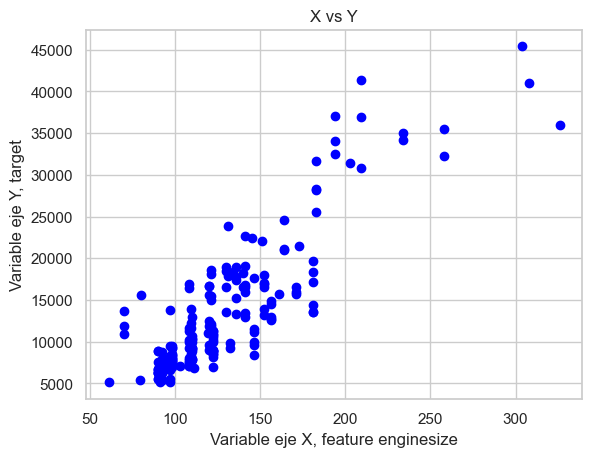

In [55]:
# para el número 1
plt.title("X vs Y")
plt.xlabel("Variable eje X, feature enginesize")
plt.ylabel("Variable eje Y, target")
plt.scatter(car_df['enginesize'], car_df['price'], color="blue", linewidth=1)
plt.show()

In [56]:
# para el número 2
import seaborn as sns # libreria seaborn https://seaborn.pydata.org/
sns.heatmap(car_df.corr())

ValueError: could not convert string to float: 'alfa-romero giulia'

C:\Users\Oscar\AppData\Local\Temp\ipykernel_16940\183613578.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


Text(0, 0.5, 'frequency')

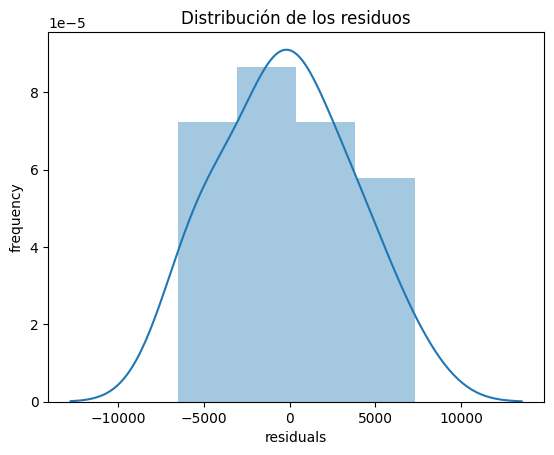

In [ ]:
# para el número 3
residual = y_test - car_y_pred
sns.distplot(residual)
plt.title("Distribución de los residuos")
plt.xlabel("residuals")
plt.ylabel("frequency")

Text(0, 0.5, 'residuos')

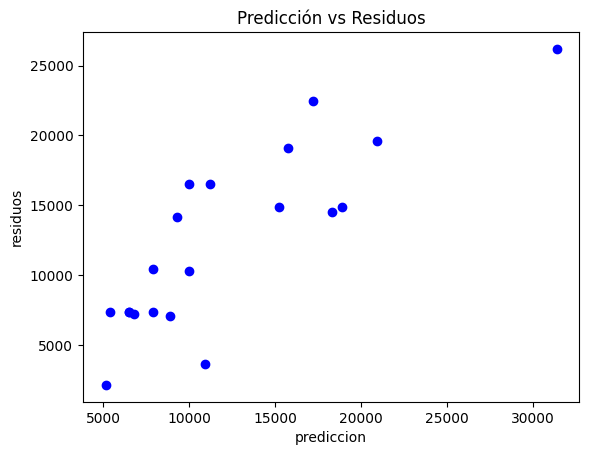

In [ ]:
# para el número 4
plt.scatter(y_test, car_y_pred, color="blue", linewidth=1)
plt.title("Predicción vs Residuos")
plt.xlabel("prediccion")
plt.ylabel("residuos")

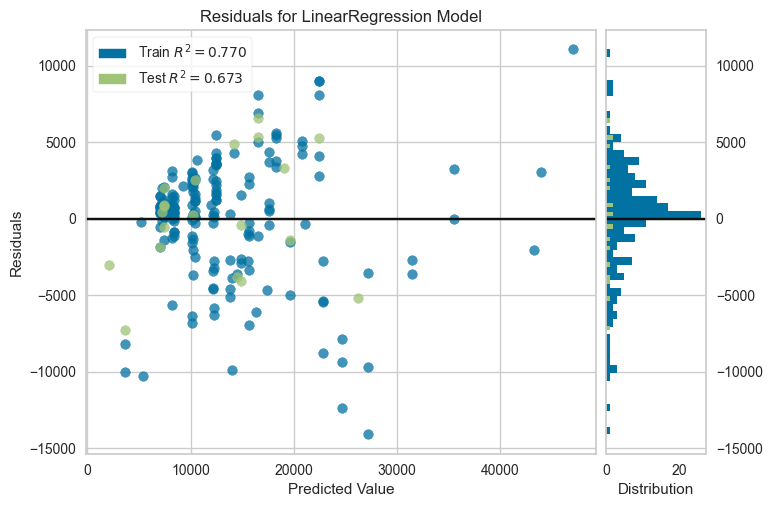

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
# otra manera
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
# para el número 5
# pista a partir de lo ya calculado, sacar los residuos (y_test - y_pred)
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(residual)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Durbin-Watson: 1.3796826164601126
Signs of positive autocorrelation 

Assumption not satisfied


**Regresión lineal múltiple**

In [ ]:
# seleccionar solo las variables numéricas

In [ ]:
car_df_x = car_df.drop(columns=['price'])

In [ ]:
car_df_x = car_df_x.select_dtypes(include=np.number)

In [ ]:
car_df_y = car_df['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(car_df_x, car_df_y, test_size=0.20, random_state=42)

In [ ]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [ ]:
regr = linear_model.LinearRegression()
# Entrenamos el modelo utilizando los datos de entrenamiento
regr.fit(X_train, y_train)
# Hacemos las predicciones utilizando los datos de test (datos no conocidos)
diabetes_y_pred = regr.predict(X_test)

In [ ]:
# MSE, mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, diabetes_y_pred))
# R2 - recordemos que 1 es la predicció perfecta
print("R2: %.2f" % r2_score(y_test, diabetes_y_pred))

Mean squared error: 11710105.08
R2: 0.85
